In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [2]:
clustal_hmm = pd.read_csv("hmm41_clustal_signalp_out.txt", delimiter="\t", header=1)
# hmm_hmm = pd.read_csv("hmm41_hmmeraln_signalp_out.txt", delimiter="\t", header=1)
vae = pd.read_csv("vae41_99_signalp_out.txt", delimiter="\t", header=1)

# trans = pd.read_csv("transformer_signalp_out.txt", delimiter="\t", header=1)
# heuristic = pd.read_csv("transformer_matched_signalp_out.txt", delimiter="\t", header=1)

In [3]:
clustal = [1-val for val in clustal_hmm['OTHER'].values]
# hmm_hmm = [1-val for val in hmm_hmm['OTHER'].values]
vae = [1-val for val in vae['OTHER'].values]

with open("heuristic_signalp_out.p","rb") as f:
    heur = pickle.load(f)
    
with open("transformer_gen_probs.p","rb") as f:
    trans = pickle.load(f)

In [4]:
df = pd.DataFrame()
data_name = ["pHMM", "heuristic", "VAE", "Transformer"]
for i, dat in enumerate([clustal, heur, vae, trans]):
    name = data_name[i]
    names = [name for i in range(len(dat))]
    _df = pd.DataFrame({"SignalP Prob":dat, "name":names})
    df = df.append(_df)

In [5]:
for dat in [clustal, heur, vae, trans]:
    print(np.average(dat), np.std(dat))

0.156434669921875 0.1925524763685083
0.7084829999999999 0.25290618181523755
0.9203074765625 0.1515423524701879
0.9039436707317072 0.1710920674785915


In [6]:
from scipy.stats import ttest_ind
ttest_ind(vae, trans, equal_var=False).pvalue

0.2509633330521415

In [7]:
# ax = sns.swarmplot(x=df["SignalP Prob"], y=df["name"])

/Users/ZacharyWu1/miniconda3/envs/torch_hmm/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
No handles with labels found to put in legend.


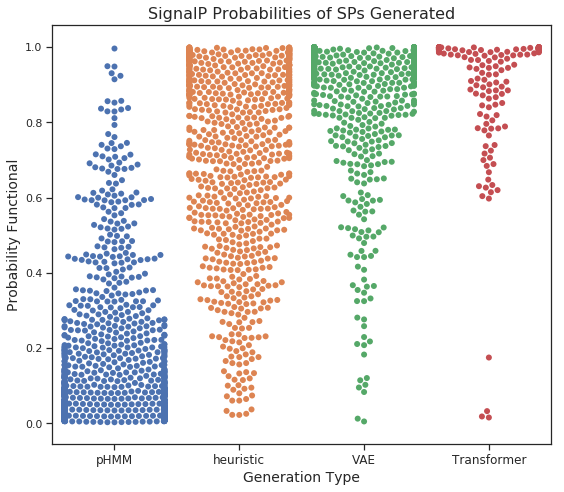

In [8]:
sns.set(font='helvetica', context='notebook', font_scale=1, style='ticks')
f = plt.figure(figsize=(8,7))
# color_palette_dict = {'heuristic generated':sns.xkcd_rgb["green"], 
#                       'transformer generated':sns.xkcd_rgb["nice blue"]} 
#                       'Incorrect Construct':sns.xkcd_rgb["black"], 
#                       'NonFunc Construct':sns.xkcd_rgb["steel grey"]}
chart = sns.swarmplot(x="name", y="SignalP Prob", data=df, size=6) #palette=color_palette_dict, 

title = "SignalP Probabilities of SPs Generated"

plt.xlabel('Generation Type', fontsize=14)
plt.ylabel('Probability Functional', fontsize=14)
plt.title(title, fontsize=16)
#         chart.set_title(title)

chart.set_xticklabels(
        chart.get_xticklabels(), 
        fontweight='light',
        fontsize='medium')

plt.tight_layout()
# plt.legend().set_title('Classification')
plt.legend().set_visible(False)
display(chart)

f.savefig('comparison_plot.png', dpi=300)

In [9]:
for dat in [clustal, heur, vae, trans]:
    print(np.average(dat), np.std(dat))

0.156434669921875 0.1925524763685083
0.7084829999999999 0.25290618181523755
0.9203074765625 0.1515423524701879
0.9039436707317072 0.1710920674785915


In [10]:
names = ["pHMM", "heuristic", "VAE", "Transformer"]
for i,dat in enumerate([clustal, heur, vae, trans]):
    for j, d2 in enumerate([clustal, heur, vae, trans]):
        p = ttest_ind(dat, d2, equal_var=False).pvalue
#         if p > 0.00001:
        print(names[i], '\t', names[j], '\t',p)
#         print(ttest_ind(dat, d2, equal_var=False).pvalue)

pHMM 	 pHMM 	 1.0
pHMM 	 heuristic 	 5.92990967e-316
pHMM 	 VAE 	 0.0
pHMM 	 Transformer 	 1.7045363262613155e-128
heuristic 	 pHMM 	 5.92990967e-316
heuristic 	 heuristic 	 1.0
heuristic 	 VAE 	 1.2025719518556043e-80
heuristic 	 Transformer 	 5.021643475856889e-28
VAE 	 pHMM 	 0.0
VAE 	 heuristic 	 1.2025719518556043e-80
VAE 	 VAE 	 1.0
VAE 	 Transformer 	 0.2509633330521415
Transformer 	 pHMM 	 1.7045363262613155e-128
Transformer 	 heuristic 	 5.021643475856889e-28
Transformer 	 VAE 	 0.2509633330521415
Transformer 	 Transformer 	 1.0
